# MNIST classifier notebook
This is a notebook for a brief exploration and explanation of the data and models. This model code is used for all the visualisations. These models are MNIST classifier models, the "hello world" of machnie learning models.

The MNIST classifier dataset contains low resolution 28x28 pixel images of handwrittendigits, and the aim of the model is to recognise which digits are represented in the image, usually using a neural network.

In [1]:
# Requirements:
%pip install matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import random    
import matplotlib.pyplot as plt   
%matplotlib inline  

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

2023-07-06 16:24:43.436577: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


As can be seen above, for simplicity I am using TensorFlow's keras library to create the model. This way the keras MNIST classifier dataset can be imported directly, without need to load local files, making it easy to reproduce by anyone else with TensorFlow.

Once imported the requirements, we can start by preparing the dataset. First of all, it needs to be separated into a training and a testing set. There are 70'000 total datapoints, and they are by default divided into 60'000 training and 10'000 testing datapoints for most basic MNIST classifier models.

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# To see how the dataset was split:
print("The dataset has length {}, divided into {} training and {} testing datapoints.".format(len(X_train)+len(X_test), len(X_train), len(X_test)))

The dataset has length 70000, divided into 60000 training and 10000 testing datapoints.


Let's look at one of the images in the dataset, selected at random from the training set.

This image corresponds to the digit 2


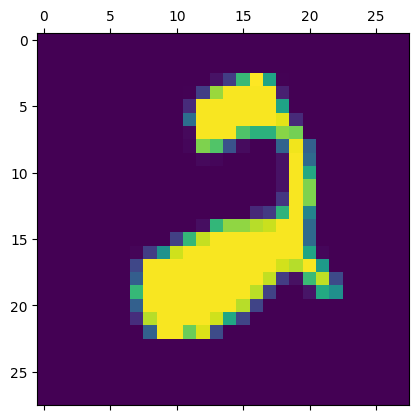

In [4]:
random_index = int(random.uniform(0, 60000))
plt.matshow(X_train[random_index])
print("This image corresponds to the digit", y_train[random_index])

We know what the datapoints look like, and we know that our inputs X correspond to low quality images, composed of 28x28 pixels, each with a value between 0 and 255. We want to be able to train a model to recognise these inputs are the digit they are supposed to represent, our y. Let's start by dividing the inputs by 255 so that they contain values between 0 and 1.

In [5]:
X_train_divided = X_train / 255
X_test_divided = X_test / 255

Now let's create the model. Here is a 3 layer one, we can argue that there's actually only 2 layers because the first one is just for flattening and is an input layer, but that is still an important step. The second and third are 'dense' layers, as in fully connected. The respective sizes are 784 (= 28 * 28) for the input layer, 128 for the first dense layer, and 10 for the last, which also tranlsates to the output of 10 possible digits (0 through 9). In the dense layers we also define the activation type.

In [6]:
model = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, 'relu'),
    keras.layers.Dense(10, 'sigmoid')
])

Next, we compile the model, this part helps the model train itself based on the criteria given, in this case for example we want to evaluate the model based on its accuracy.

In [7]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Now to train the model:

In [8]:
model.fit(X_train_divided, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2570 - accuracy: 0.9270
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1139 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0782 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0589 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0455 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0371 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0285 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0244 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0180 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.017

Lastly, it's time to evaluate the model:

In [9]:
model.evaluate(X_test_divided, y_test)

313/313 [==============================] - 0s 864us/step - loss: 0.0772 - accuracy: 0.9778


[0.07721719145774841, 0.9778000116348267]

We could also have saved the model metrics so as to log them, by fitting the model in a history variable, and saving the evaluation in a score variable, as in "history = model.fit(X_train_divided, y_train, epochs = 10)" and "score = model.evaluate(X_test_divided, y_test)". In any case, this specific model reaches an evaluated accuracy of almost 98%, which means it's probably overfitting.

Now we have created a model, we can make some with different hyperparameters, changing anything from the number of nodes in the creation step to the evaluation metrics in the compiler. To make it easy I chose three node sizes and activation types for each of the two dense layers, and assigned them with no particular order, to try to create models with varying accuracy, whilst keeping the same compilation for simplicity's sake.

In [10]:
first_layer_nodes = [100, 50, 100, 50, 100, 50]
first_layer_activation = ["relu", "sigmoid", "softmax", "relu", "sigmoid", "softmax"]
second_layer_nodes = [10, 15, 25, 25, 15, 10]
second_layer_activation = ["sigmoid", "softmax", "relu", "relu", "sigmoid", "softmax"]


histories = [0, 0, 0, 0, 0, 0]
scores = []

for i in range(6):
    model = Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(first_layer_nodes[i], first_layer_activation[i]),
        keras.layers.Dense(second_layer_nodes[i], second_layer_activation[i])
    ])
    model.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )
    histories[i] = model.fit(X_train_divided, y_train, epochs = 5, verbose = 1)
    scores.append(model.evaluate(X_test_divided, y_test))

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2750 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1247 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0873 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0664 - accuracy: 0.9797
Epoch 5/5
313/313 [==============================] - 0s 820us/step - loss: 0.0884 - accuracy: 0.9734
Epoch 1/5
1875/1875 [==============================] - 2s 984us/step - loss: 0.5197 - accuracy: 0.8795
Epoch 2/5
1875/1875 [==============================] - 2s 973us/step - loss: 0.2330 - accuracy: 0.9343
Epoch 3/5
1875/1875 [==============================] - 2s 974us/step - loss: 0.1816 - accuracy: 0.9488
Epoch 4/5
1875/1875 [==============================] - 2s 975us/step - loss: 0.1507 - accuracy: 0.9577
Epoch 5/5
313/313 [==============================] - 0s 795us/step - loss: 0.1337 -

The history and score saving here is just to prove that it can be done. Here are some comparisons between the models that can be done very simply with no additional libraries. It's not the most comfortable way to judge the evolution of the models through their epochs of training, which is why we look to visualisation tools and libraries for that.

In [11]:
print("These are the metrics for the first model: \n", histories[0].history)
print("\nThis is the accuracy of the third model for each epoch: \n", histories[2].history['accuracy'])
print("\nThis is the loss of the 4th model after its 4th epoch: \n", histories[3].history['loss'][3])
print("\nThis is the accuracy evaluation of the 5th model: \n", scores[4][1])

max_accuracy = 0
best_model = None
for i in range(5):
   if scores[i][1] > max_accuracy:
      best_model = i
      max_accuracy = scores[i][1]
print("\nThe best model is model number", best_model +1, "with an accuracy of", max_accuracy, "%")

min_accuracy = 100
worst_model = None
for i in range(5):
   if scores[i][1] < min_accuracy:
      worst_model = i
      min_accuracy = scores[i][1]
print("\nThe worst model is model number", worst_model +1, "with an accuracy of", min_accuracy, "%")

These are the metrics for the first model: 
 {'loss': [0.2749541699886322, 0.12474231421947479, 0.08731238543987274, 0.06635019183158875, 0.051940008997917175], 'accuracy': [0.9214500188827515, 0.9631166458129883, 0.973800003528595, 0.9797000288963318, 0.9842000007629395]}

This is the accuracy of the third model for each epoch: 
 [0.10076666623353958, 0.09875000268220901, 0.09876666963100433, 0.09870000183582306, 0.09871666878461838]

This is the loss of the 4th model after its 4th epoch: 
 3.166613817214966

This is the accuracy evaluation of the 5th model: 
 0.9692999720573425

The best model is model number 1 with an accuracy of 0.9733999967575073 %

The worst model is model number 3 with an accuracy of 0.09799999743700027 %
